# MCO 1 - 2012 Family Income and Expenditure Survey (FIES)
In this Notebook, we will explore income and expenditure behavior across Filipino households using the 2012 Family Income and Expenditure Survey (FIES) dataset. We will focus on statistical inference, particularly confidence intervals and hypothesis testing for means, while also applying unsupervised learning techniques such as clustering to reveal patterns in household spending.

We aim to understand how households from different income groups allocate their spending across essential categories like food, education, and utilities.

The dataset, provided in the file FIES PUF 2012 Vol.1.CSV, comes from the Philippine Statistics Authority and contains anonymized microdata on household income from various sources (such as salaries, businesses, and remittances), categorized expenditures (including food, housing, education, health, and utilities), as well as demographic and geographic variables like region and urban/rural classification. Household characteristics such as household size and number of earners are also included. 

# Dataset Description

## Overview

The **Family Income and Expenditure Survey (FIES) 2012 Volume 1** is a comprehensive household-level dataset collected by the Philippine Statistics Authority (PSA). This dataset provides detailed information about Filipino families' income sources, expenditure patterns, and socio-demographic characteristics, serving as a critical resource for understanding household economic behavior and living standards in the Philippines.

## Data Collection Methodology

The FIES 2012 was conducted as a nationwide survey using a stratified multi-stage sampling design:

- **Survey Period**: 2012
- **Coverage**: National scope covering all regions of the Philippines
- **Sampling Method**: Stratified multi-stage cluster sampling with Primary Sampling Units (PSUs)
- **Data Collection**: Two-visit approach with structured questionnaires administered to selected households
- **Weighting**: Base weights and final weights (RFACT) provided to ensure national representativeness

The survey utilized a systematic sampling framework with:
- Regional stratification (W_REGN)
- Urban/Rural classification (URB)
- Stratum coding (RSTR)
- PSU identification for cluster sampling

### Sampling Implications
- **Representativeness**: The stratified sampling design ensures national and regional representativeness when proper weights are applied
- **Temporal Limitations**: Data reflects 2012 economic conditions and may not capture more recent economic changes
- **Reference Period Bias**: Income and expenditure data are based on recall periods (past six months for some variables), which may introduce recall bias
- **Seasonal Variations**: Data collection timing may not fully capture seasonal income fluctuations, particularly for agricultural households
- **Self-reporting Bias**: Income and expenditure data rely on household self-reporting, potentially leading to underreporting of income or misclassification of expenses


### Basic Structure
- **Unit of Analysis**: Individual households
- **Number of Observations**: 40171
- **Data Type**: Cross-sectional survey data

### Row and Column Representation
- **Rows**: Each row represents a unique household in the survey
- **Columns**: Each column represents a specific variable measuring household characteristics, income sources, or expenditure categories
- **Unique Identifiers**: Households are identified through multiple ID variables (W_REGN, W_OID, W_SHSN, W_HCN)

## Key Attribute Categories

### 1. Identification and Sampling Variables
- **W_REGN**: Region code
- **W_OID**: Other unique identifier
- **W_SHSN**: Sample household serial number
- **W_HCN**: Household control number
- **RSTR**: Stratum
- **PSU**: PSU number
- **URB**: Urban/Rural classification
- **BWEIGHT, RFACT**: Base and final sampling weights

### 2. Income Variables (17 categories)
**Employment Income:**
- **AGRI_SAL**: Agricultural sector wages and salaries
- **NONAGRI_SAL**: Non-agricultural sector wages and salaries
- **WAGES**: Combined agricultural and non-agricultural wages

**Other Income Sources:**
- **NETSHARE**: Net share from crops, livestock, and fishing
- **CASH_ABROAD**: Remittances and assistance from abroad
- **CASH_DOMESTIC**: Domestic cash assistance and support
- **RENTALS_REC**: Rental income from properties
- **INTEREST**: Interest from deposits and loans
- **PENSION**: Pension and retirement benefits
- **DIVIDENDS**: Investment dividends
- **OTHER_SOURCE** = "Other sources of income not elsewhere classified"
- **NET_RECEIPT** = "Total net receipts from family sustenance activity"
- **REGFT** = "Total received as gifts"
- **LOSSES** = "Losses from entrepreneurial activities"

**Entrepreneurial Income (11 categories):**
- **NET_CFG**: Crop farming and gardening
- **NET_LPR**: Livestock and poultry raising
- **NET_FISH**: Fishing activities
- **NET_RET**: Wholesale and retail trade
- **NET_MFG**: Manufacturing
- **NET_FOR** = Forestry and hunting
- **NET_COM** = Community, social, recreational, and personal services
- **NET_TRANS** = Transportation, storage, and communication services
- **NET_MIN** = "Mining and quarrying
- **NET_CONS** = Construction
- **NET_NEC** = Entrepreneurial activities not elsewhere classified


**Derived Income:**
- **EAINC**: Total entrepreneurial income
- **TOINC**: Total household income

### 3. Expenditure Variables (20+ categories)
**Food Expenditure (14 detailed categories):**
- **T_BREAD**: Bread and cereals
- **T_MEAT**: Meat products
- **T_FISH**: Fish and seafood
- **T_MILK**: Milk, cheese, and eggs
- **T_FRUIT, T_VEG**: Fruits and vegetables
- **T_FOOD_HOME**: Total food consumed at home
- **T_FOOD_OUTSIDE**: Food consumed outside home
- **T_FOOD**: Total food expenditure
- **T_OIL** = Total food expenditure for oil and fats
- **T_SUGAR** = Total food expenditure for sugar, jam, honey, chocolate, and confectionery
- **T_FOOD_NEC** = Total food expenditure for other food not elsewhere classified
- **T_COFFEE** = Total food expenditure for coffee, cocoa, and tea
- **T_MINERAL** = Total food expenditure for mineral water, soft drinks, fruit juices, and vegetable juices
- **T_ALCOHOL** = Total food expenditure for alcoholic beverages
- **T_TOBACCO** = Total food expenditure for tobacco
- **T_OTHER_VEG** = Total food expenditure for other vegetable-based products

**Non-Food Expenditure:**
- **T_CLOTH**: Clothing and footwear
- **T_HOUSING_WATER**: Housing, utilities, and water
- **T_TRANSPORT**: Transportation
- **T_HEALTH**: Healthcare
- **T_EDUCATION**: Education
- **T_RECREATION**: Recreation and culture
- **T_COMMUNICATION**: Communication services
- **T_FURNISHING** = Furnishings and household equipment
- **T_MISCELLANEOUS** = Miscellaneous goods and services
- **T_OTHER_EXPENDITURE** = Other expenditure
- **T_OTHER_DISBURSEMENT** = Other disbursements

**Derived Expenditure:**
- **T_TOTEX**: Total expenditure
- **T_TOTDIS**: Total disbursements

### 4. Household Demographics (15 variables)
- **FSIZE**: Family size
- **SEX, AGE, MS**: Head of household characteristics
- **HGC**: Education level of household head
- **MEMBERS**: Total family members
- **AGELESS5, AGE5_17**: Age distribution of family members
- **EMPLOYED_PAY, EMPLOYED_PROF**: Employment status of family member
- **JOB** = Did the head of the family have a job or business during the past six months?
- **OCCUP** = Primary occupation of the head of the family
- **KB** = Kind of business / industry of the head of the family
- **CW** = Class of worker of the head of the family
- **HHTYPE** = Type of household
- **SPOUSE_EMP** = "Did the spouse of the head of the family have a job or business?

### 5. Housing and Assets (20+ variables)
**Housing Characteristics:**
- **BLDG_TYPE**: Type of building
- **ROOF, WALLS**: Construction materials
- **TENURE**: Housing tenure status
- **TOILET**: Toilet facilities
- **ELECTRIC**: Electricity access
- **WATER**: Water source
- **HSE_ALTERTN** = Alterations
- **DISTANCE** = Distance from the water source

**Asset Ownership (Quantities):**
- **TV_QTY, RADIO_QTY**: Entertainment devices
- **REF_QTY, WASH_QTY**: Household appliances
- **CAR_QTY, MOTORCYCLE_QTY**: Transportation assets
- **PC_QTY, CELLPHONE_QTY**: Technology assets
- **CD_QTY** = CD / VCD / DVD assets
- **STEREO_QTY** = Stereo set assets
- **AIRCON_QTY** = Air conditioners assets
- **LANDLINE_QTY** = Landline / wireless telephones assets
- **OVEN_QTY** = Stoves with oven / gas range assets
- **MOTOR_BANCA_QTY** = Motorized bangka assets


### 6. Derived Analysis Variables
- **PCINC**: Per capita income
- **NATPC, NATDC**: National income decile classifications
- **REGPC, REGDC**: Regional income decile classifications
- **T_ACTRENT** = Actual house rent
- **T_RENTVAL** = House rent / rental value
- **T_IMPUTED_RENT** = Imputed house rental value
- **T_BIMPUTED_RENT** = Imputed housing benefit rental value
- **T_NFOOD** = Non-food expenditure
- **T_OTHREC** = Other receipts
- **T_TOREC** = Total receipts
- **FOOD_ACCOM_SRVC** = Food accommodation service
- **POP_ADJ** = Population adjustment

## Dataset Significance

This dataset is significant for the following:
- **Poverty Analysis**: Income and expenditure patterns for poverty measurement
- **Consumer Behavior Studies**: Detailed expenditure breakdowns across categories
- **Regional Economic Analysis**: Geographic variations in household economics
- **Policy Research**: Evidence base for social and economic policy development
- **Inequality Studies**: Income distribution and household welfare analysis

The comprehensive nature of the FIES 2012 dataset makes it a valuable resource for understanding household economic behavior, consumption patterns, and living standards in the Philippines during the 2012 period.

## Research Questions

### General Research Question:
What are the key differences in expenditure allocation (e.g., food, education, utilities) across income groups?

#### Supporting Research Questions:
1. What are the average and median incomes in each income group?
2. Which expenditure category represents the largest portion of per capita income for each group?
3. Do wealthier households spend a higher or lower percentage of their per capita income on basic needs like food?
4. Are low-income households more likely to prioritize essential expenses over discretionary (e.g., entertainment, travel) ones
5. How does the ratio of essential spending to per capita income compare with discretionary spending across income groups?
6. How does the ratio of education spending to per capita income change across income groups?



## Importing Libraries

We will import essential Python libraries for data analysis and visualization. `numpy` is used for numerical operations, `pandas` for data manipulation and analysis, `matplotlib.pyplot` for creating visualizations, and `scipy.stats` for statistical functions and hypothesis testing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')


## Family Income and Expenditure Data


We will load the Family Income and Expenditure Survey (FIES) dataset from the provided CSV file using pandas' `read_csv` function. After loading, we will use the `head()` method to display the first few rows and get an initial look at the data structure and contents.

In [2]:
fies_df = pd.read_csv('./Dataset/FIES_PUF_2012_Vol.1.CSV')
fies_df.head()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,...,01,01,,,0.946172,108417.00,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,...,,01,,01,0.946172,30631.60,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,...,,01,,,0.946172,86992.50,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,...,,01,,,0.946172,43325.75,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,...,,,,01,0.946172,37481.80,6,6,6,5


We will use the `info()` function to get a concise summary of the DataFrame, including the number of non-null entries, column data types, and memory usage. This helps us understand the structure and completeness of the dataset.

In [3]:
fies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Columns: 119 entries, W_REGN to REGPC
dtypes: float64(5), int64(92), object(22)
memory usage: 36.5+ MB


Next, we will use the `describe()` function to generate descriptive statistics for the numerical columns, such as mean, standard deviation, minimum, and maximum values. This provides an overview of the distribution and central tendencies of the data.

In [4]:
fies_df.describe()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,HSE_ALTERTN,TOILET,ELECTRIC,WATER,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
count,40171.000000,4.017100e+04,40171.000000,40171.000000,40171.000000,40171.000000,40171.000000,40171.000000,40171.000000,40171.000000,...,40171.000000,40171.000000,40171.000000,40171.000000,40171.000000,4.017100e+04,40171.000000,40171.000000,40171.000000,40171.000000
mean,13.019890,4.210536e+09,9.633666,1563.601753,1.617311,21547.277215,258123.702099,340.330363,533.363298,4.699223,...,1.940330,1.718130,1.131563,3.186030,0.942329,5.432433e+04,5.233303,5.238306,5.445769,5.455129
std,11.995555,2.285729e+09,6.198442,2977.363506,0.486049,3520.981146,112143.268816,112.377931,209.996517,2.194050,...,0.236877,1.539145,0.338019,2.405758,0.038631,7.372111e+04,2.874581,2.856486,2.866703,2.864137
min,1.000000,1.010010e+08,1.000000,1.000000,1.000000,2475.000000,100010.000000,92.250000,126.164300,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.876132,2.979200e+03,1.000000,1.000000,1.000000,1.000000
25%,6.000000,2.239012e+09,4.000000,95.000000,1.000000,21100.000000,116384.000000,271.500000,399.615000,3.000000,...,2.000000,1.000000,1.000000,1.000000,0.924450,1.996803e+04,3.000000,3.000000,3.000000,3.000000
50%,10.000000,4.112005e+09,9.000000,204.000000,2.000000,22100.000000,216212.000000,329.750000,509.874900,4.500000,...,2.000000,1.000000,1.000000,3.000000,0.940724,3.336975e+04,5.000000,5.000000,5.000000,5.000000
75%,14.000000,6.210006e+09,14.000000,393.000000,2.000000,23200.000000,316519.000000,428.710000,634.160800,6.000000,...,2.000000,2.000000,1.000000,4.000000,0.961401,6.175867e+04,8.000000,8.000000,8.000000,8.000000
max,42.000000,9.804035e+09,30.000000,8026.000000,2.000000,29000.000000,416581.000000,1630.200000,2895.814900,20.500000,...,2.000000,7.000000,2.000000,12.000000,1.058416,3.231120e+06,10.000000,10.000000,10.000000,10.000000


### Data Cleaning

#### Multiple Representations and Default Values

When cleaning data, it is important to check for multiple representations of the same value, especially in categorical columns. Multiple representations can occur when the same category is recorded in different ways (e.g., "Male", "male", "M", or "m"). This can lead to inaccurate analysis and misleading results. In this dataset, we examined the categorical columns to identify any such inconsistencies. 

In [5]:
# Check if there are categorical columns
categorical_columns = fies_df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['OCCUP', 'KB', 'CW', 'AGELESS5', 'AGE5_17', 'EMPLOYED_PAY',
       'EMPLOYED_PROF', 'DISTANCE', 'RADIO_QTY', 'TV_QTY', 'CD_QTY',
       'STEREO_QTY', 'REF_QTY', 'WASH_QTY', 'AIRCON_QTY', 'CAR_QTY',
       'LANDLINE_QTY', 'CELLPHONE_QTY', 'PC_QTY', 'OVEN_QTY',
       'MOTOR_BANCA_QTY', 'MOTORCYCLE_QTY'],
      dtype='object')


There are multiple categorical columns, but upon manual inspection, these were flagged as categorical due to having spaces as values instead of NaN. We should replace continuous spaces with np.nan, convert these columns into numeric types if applicable, then print categorical columns again to verify.

In [6]:
# Replace cells with only spaces or empty strings with np.nan
fies_df = fies_df.replace(r'^\s*$', np.nan, regex=True)

# Convert columns that can be numeric to numeric types
for col in fies_df.columns:
    fies_df[col] = pd.to_numeric(fies_df[col], errors='ignore')

# Check if there are categorical columns
categorical_columns = fies_df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index([], dtype='object')


Since there are no categorical columns present, there are no issues with multiple representations in this case. Moreover, there are also no cases of inconsistent formatting in the dataset.

#### Checking for Incorrect Data Types

It is important to ensure that each column in the dataset contains consistent data types. Inconsistent data types within a column (e.g., mixing strings and numbers) can lead to errors during analysis and may affect the results of computations or visualizations. To check for inconsistent data types, we examine each column to see if it contains more than one type of data. If any columns are found with mixed types, they may require cleaning or conversion to a uniform type before proceeding with further analysis.

In [7]:
# Check if any column contains more than one data type
numOfColumns = 0;

for col in fies_df.columns:
    types_in_col = fies_df[col].apply(type).unique()
    if len(types_in_col) > 1:
        numOfColumns += 1
print("Number of columns with mixed data types:", numOfColumns)

Number of columns with mixed data types: 0


After checking each column for mixed data types, we found that all columns in the dataset contain consistent data types. This ensures that the data is clean and ready for further analysis without the need for additional type conversions.

#### Treating Missing Values

Handling missing values is an essential part of data preprocessing to ensure the accuracy and reliability of our analysis. In this dataset, missing values are primarily found in columns related to household item quantities.

For these columns with missing values, we will use appropriate strategies depending on how these relate to our research questions. This approach allows us to maximize the use of the dataset.

In [8]:
# Show only columns with missing values and their missing percentage
missing_cols = fies_df.columns[fies_df.isnull().any()]
missing_percent = fies_df[missing_cols].isnull().mean() * 100

print("Columns with missing values and their percentages:")
print(missing_percent.round(2).astype(str) + '%')

Columns with missing values and their percentages:
OCCUP              18.36%
KB                 18.36%
CW                 18.36%
AGELESS5           38.24%
AGE5_17             20.5%
EMPLOYED_PAY       20.65%
EMPLOYED_PROF      31.61%
DISTANCE           41.84%
RADIO_QTY          39.96%
TV_QTY             19.45%
CD_QTY             35.51%
STEREO_QTY         57.29%
REF_QTY            44.26%
WASH_QTY           50.05%
AIRCON_QTY          63.8%
CAR_QTY            65.11%
LANDLINE_QTY       65.05%
CELLPHONE_QTY      15.99%
PC_QTY             58.33%
OVEN_QTY           60.08%
MOTOR_BANCA_QTY    68.55%
MOTORCYCLE_QTY     57.57%
dtype: object


Although there are many missing values in the dataset, they are primarily found in columns that are not essential for answering our research questions. Therefore, we can drop these columns, especially since they do not hold any relation to our research questions.

In [9]:
# Drop columns with missing values
fies_df = fies_df.dropna(axis=1)

# Show again columns with missing values and their missing percentage
missing_cols = fies_df.columns[fies_df.isnull().any()]
missing_percent = fies_df[missing_cols].isnull().mean() * 100

print("Columns with missing values and their percentages:")
print(missing_percent.round(2).astype(str) + '%')

Columns with missing values and their percentages:
Series([], dtype: object)


#### Treating duplicates

To ensure data integrity and avoid skewed analysis, it is important to check for and remove duplicate rows in the dataset. Duplicate entries can occur due to data entry errors or merging datasets from multiple sources. By using the `drop_duplicates()` function, we can identify and remove any repeated rows. We also compare the number of rows before and after this operation to confirm how many duplicates, if any, were found and removed.

In [10]:
# Drop duplicate rows based on all columns

initial_rows = fies_df.shape[0]
fies_df.drop_duplicates(inplace=True)
final_rows = fies_df.shape[0]
print(f"Initial categories: {initial_rows}, Final categories after dropping duplicates: {final_rows}")


Initial categories: 40171, Final categories after dropping duplicates: 40171


Here, we can see that after applying the `drop_duplicates()` function, the number of categories remains the same, which means that no categories have been duplicated.


### Creation of Income Groups

Before proceeding with outlier detection, we first classify households into income groups based on their per capita income (`PCINC`). This classification allows us to analyze patterns and differences in expenditure and income distribution across lower, middle, and upper income segments. By segmenting the data in this way, we can better understand how economic behavior varies among different income groups and ensure that subsequent analyses, such as outlier detection, are contextualized within these relevant categories.

In [11]:
fies_df['Income_Group'] = pd.qcut(fies_df['TOINC'], q=3, labels=['Lower', 'Middle', 'Upper'])

### Outlier Detection per Income Group for Key Variables

Outlier detection is a crucial step in data analysis to identify values that deviate significantly from the majority of the data. Outliers can arise due to data entry errors, measurement anomalies, or genuine extreme values. Their presence can distort statistical analyses and lead to misleading conclusions, especially when calculating means or performing hypothesis tests.

For this analysis, we focus on detecting outliers in the following key variables:
- **Income per Capita (`PCINC`)**: Represents income per capita.
- **Total Expenditures per Capita (`T_TOTEX_PC`)**: Captures the total spending of the household per capita.
- **Discretionary Expenditure per Capita (`T_DISCRETIONARY_PC`)**: Amount spent on recreation, transportation, and miscellaneous activities per capita.
- **Food Expenditure per Capita (`T_FOOD_PC`)**: Total amount spent on food per capita.
- **Education Expenditure per Capita (`T_EDUCATION_PC`)**: Total amount spent on education per capita.

We will use statistical methods such as the Interquartile Range (IQR) and Z-score to identify outliers in these variables. Outliers will be visualized using boxplots and their impact on summary statistics will be discussed.

#### Income per Capita

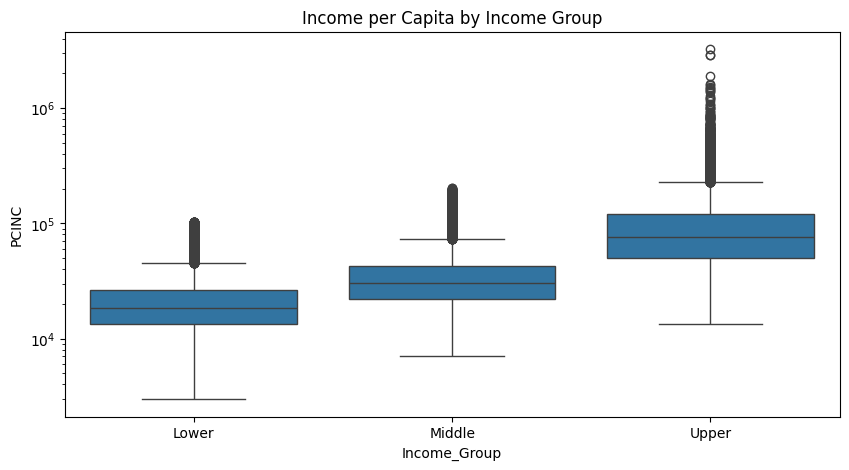

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Income_Group', y='PCINC', data=fies_df)
plt.title("Income per Capita by Income Group")
plt.yscale('log') 
plt.show()

#### Total Expenditures per Capita

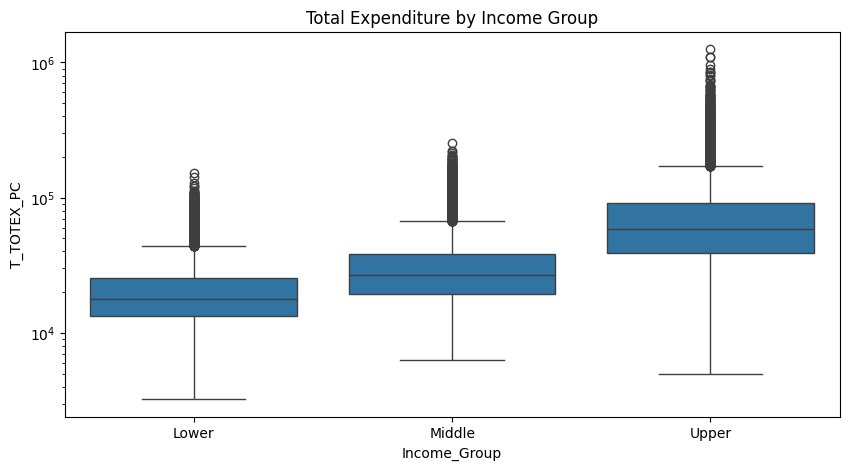

In [13]:
fies_df['T_TOTEX_PC'] = fies_df['T_TOTEX'] / fies_df['FSIZE']

plt.figure(figsize=(10, 5))
sns.boxplot(x='Income_Group', y='T_TOTEX_PC', data=fies_df)
plt.title("Total Expenditure by Income Group")
plt.yscale('log') 
plt.show()

#### Discretionary Expenditures per Capita

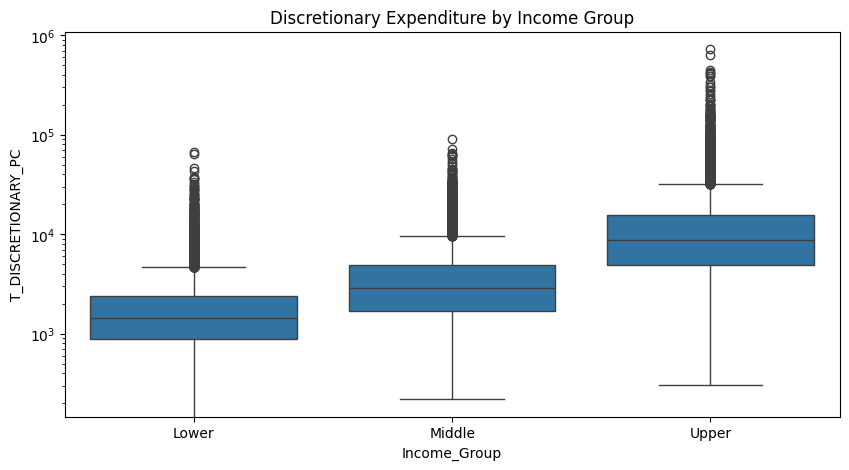

In [14]:
fies_df['T_DISCRETIONARY'] = fies_df['T_RECREATION'] + fies_df['T_TRANSPORT'] + fies_df['T_MISCELLANEOUS']
fies_df['T_DISCRETIONARY_PC'] = fies_df['T_DISCRETIONARY'] / fies_df['FSIZE']

plt.figure(figsize=(10, 5))
sns.boxplot(x='Income_Group', y='T_DISCRETIONARY_PC', data=fies_df)
plt.title("Discretionary Expenditure by Income Group")
plt.yscale('log') 
plt.show()

#### Food Expenditures per Capita

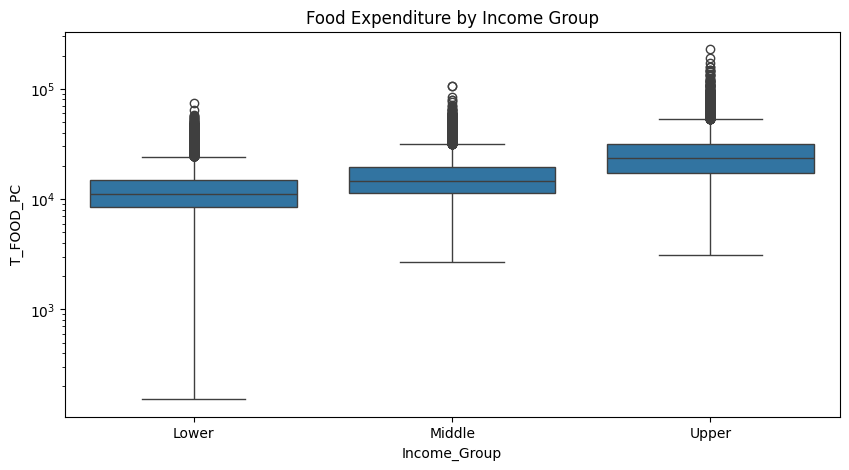

In [15]:
fies_df['T_FOOD_PC'] = fies_df['T_FOOD'] / fies_df['FSIZE']

plt.figure(figsize=(10, 5))
sns.boxplot(x='Income_Group', y='T_FOOD_PC', data=fies_df)
plt.title("Food Expenditure by Income Group")
plt.yscale('log') 
plt.show()

#### Education Expenditures per Capita

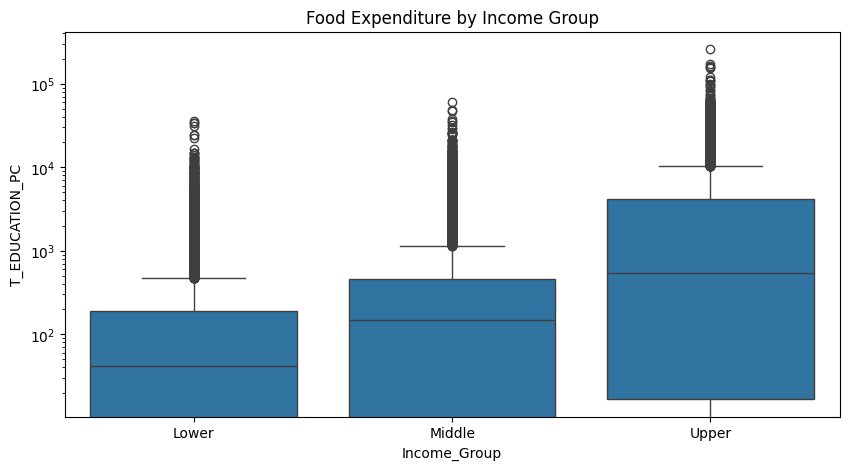

In [16]:
fies_df['T_EDUCATION_PC'] = fies_df['T_EDUCATION'] / fies_df['FSIZE']

plt.figure(figsize=(10, 5))
sns.boxplot(x='Income_Group', y='T_EDUCATION_PC', data=fies_df)
plt.title("Food Expenditure by Income Group")
plt.yscale('log') 
plt.show()

### EDA Question 1:  What are the average and median incomes in each income group? 


In this analysis, we will be calculating the average and median incomes of each income group.

To get the division of each income group, we will use quantiles. Since we have lower, middle, and upper classes, we will divide them into three (3) parts.

In [17]:
fies_df['Income_Group'] = pd.qcut(fies_df['PCINC'], q=3, labels=['Lower', 'Middle', 'Upper'])
income_groups = ['Lower', 'Middle', 'Upper']

Since they are now classified, we can now aggregate the data to get the average and median of each income group and display it.

In [18]:
income_stats_per_class = fies_df.groupby('Income_Group')['PCINC'].agg(['mean', 'median'])
print(income_stats_per_class)

                       mean     median
Income_Group                          
Lower          16268.642329  16561.915
Middle         34236.573362  33369.750
Upper         112469.280228  82804.465


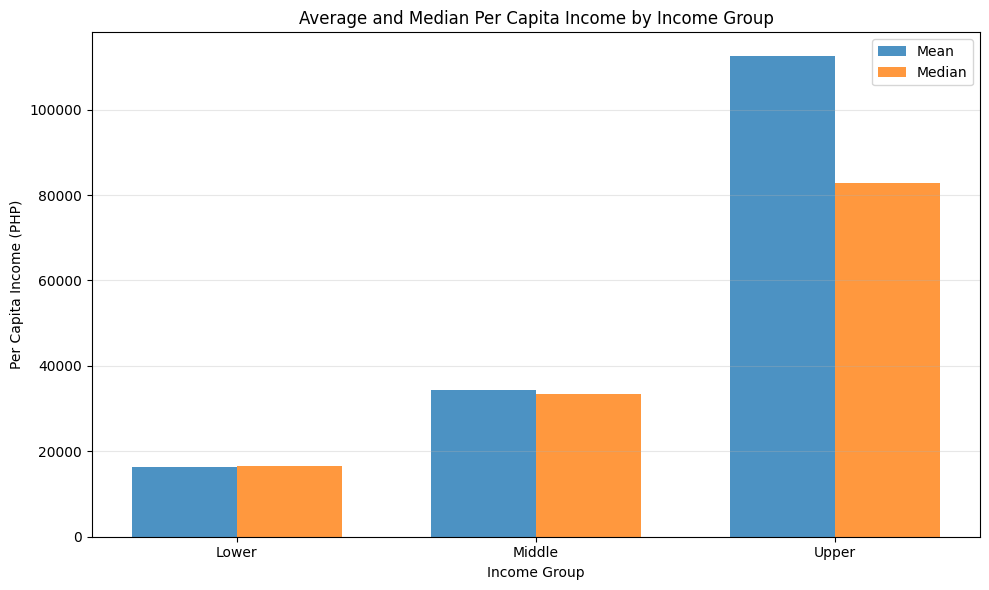

In [19]:
plt.figure(figsize=(10, 6))
income_stats_plot = income_stats_per_class.reset_index()
x = range(len(income_stats_plot))
width = 0.35

plt.bar([i - width/2 for i in x], income_stats_plot['mean'], width, label='Mean', alpha=0.8)
plt.bar([i + width/2 for i in x], income_stats_plot['median'], width, label='Median', alpha=0.8)

plt.xlabel('Income Group')
plt.ylabel('Per Capita Income (PHP)')
plt.title('Average and Median Per Capita Income by Income Group')
plt.xticks(x, income_stats_plot['Income_Group'])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### EDA Question 2: Which expenditure category represents the largest portion of per capita income for each group?

We need to get every single expenditure group for this question, therefore, we need to list them down in an variable called **expense_cols**.  

We set a new column for these expenditure groups, adding a `_PCT_INC` to store the value of percentage of per capita income spent on that certain category. 

Then, for each income group, we average the percentage for each category before getting the portion with the highest total expense by finding the maximum average percentage.  

In [20]:
expense_cols = ['T_FOOD', 'T_CLOTH', 'T_FURNISHING', 'T_HEALTH', 'T_HOUSING_WATER', 'T_RENTVAL',
                'T_TRANSPORT', 'T_COMMUNICATION', 'T_RECREATION', 'T_EDUCATION', 'T_MISCELLANEOUS',
                'T_OTHER_EXPENDITURE', 'T_OTHER_DISBURSEMENT']

for col in expense_cols:
    fies_df[col + '_PCT_INC'] = fies_df[col] / fies_df['PCINC']

expense_proportions_income = fies_df.groupby('Income_Group')[[col + '_PCT_INC' for col in expense_cols]].mean()
largest_expense_category = expense_proportions_income.idxmax(axis=1)
print("\nEDA Question 2: Largest Expense Category as % of Per Capita Income per Income Group:")
print(largest_expense_category)


EDA Question 2: Largest Expense Category as % of Per Capita Income per Income Group:
Income_Group
Lower     T_FOOD_PCT_INC
Middle    T_FOOD_PCT_INC
Upper     T_FOOD_PCT_INC
dtype: object


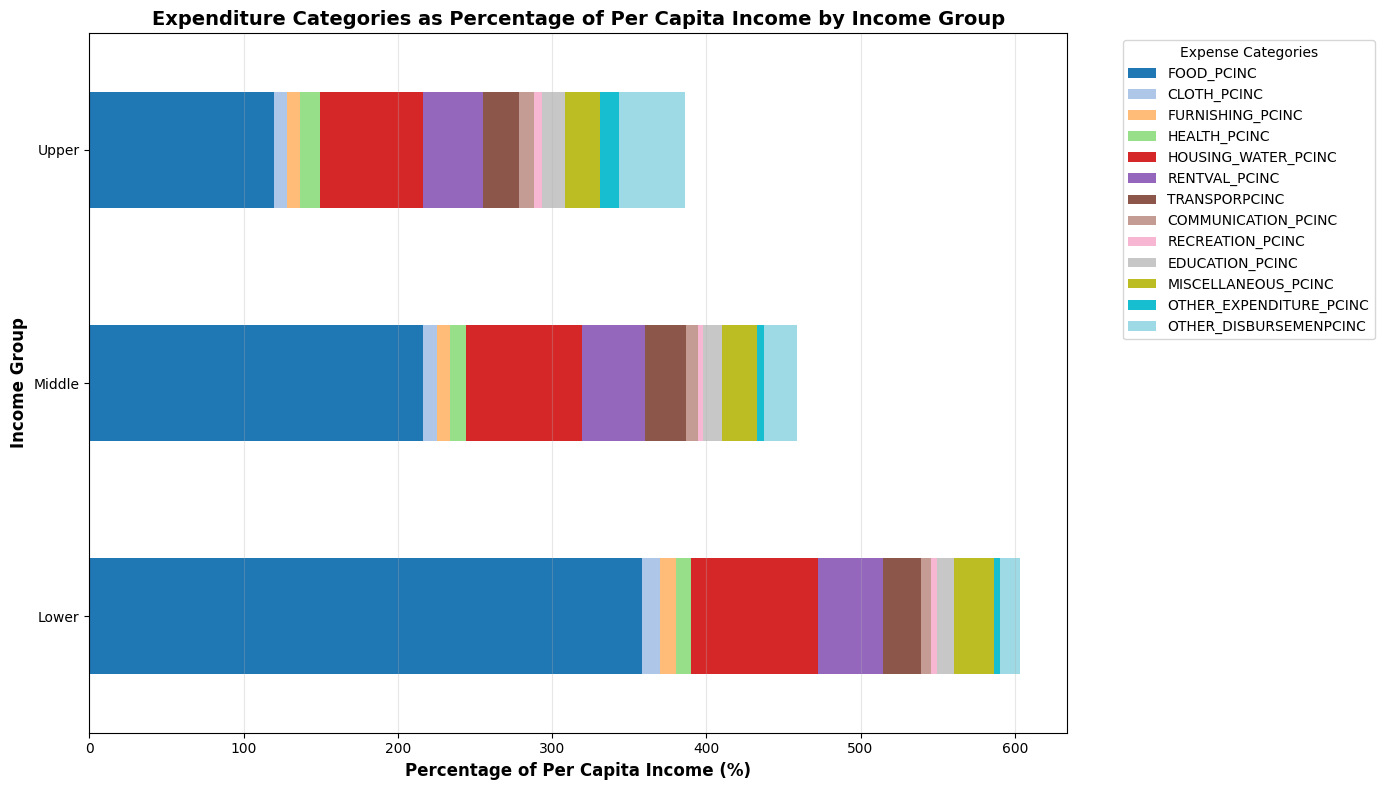

In [21]:
fig, ax = plt.subplots(figsize=(14, 8))

expense_proportions_pct = expense_proportions_income * 100
expense_proportions_pct.columns = [col.replace('T_', '').replace('_PCT_INC', '') for col in expense_proportions_pct.columns]
expense_proportions_pct.plot(kind='barh', stacked=True, ax=ax, 
                            colormap='tab20', figsize=(14, 8))

ax.set_xlabel('Percentage of Per Capita Income (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Income Group', fontsize=12, fontweight='bold')
ax.set_title('Expenditure Categories as Percentage of Per Capita Income by Income Group', 
             fontsize=14, fontweight='bold')
ax.legend(title='Expense Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Answer: All three classes spend the highest on food expenses.

### EDA Question 3: Do wealthier households spend a higher or lower percentage of their per capita income on basic needs like food?

We calculate the percentage of income that each household spends on food by dividing the total food expenditure `T_FOOD` by the per capita income `PCINC`.

Next, we group the households by their income group and calculate the average percentage of income spent on food for each group. This allows us to compare how spending on basic needs varies between wealth levels whether wealthier households spend a larger share of their income on food.

In [22]:
fies_df['PCT_FOOD_PCINC'] = fies_df['T_FOOD'] / fies_df['PCINC'] * 100
basic_needs_stats = fies_df.groupby('Income_Group')['PCT_FOOD_PCINC'].mean()
print("\nEDA Question 3: Average Percentage of Per Capita Income Spent on Food by Income Group:")
print(basic_needs_stats)


EDA Question 3: Average Percentage of Per Capita Income Spent on Food by Income Group:
Income_Group
Lower     358.253165
Middle    216.360675
Upper     119.932706
Name: PCT_FOOD_PCINC, dtype: float64


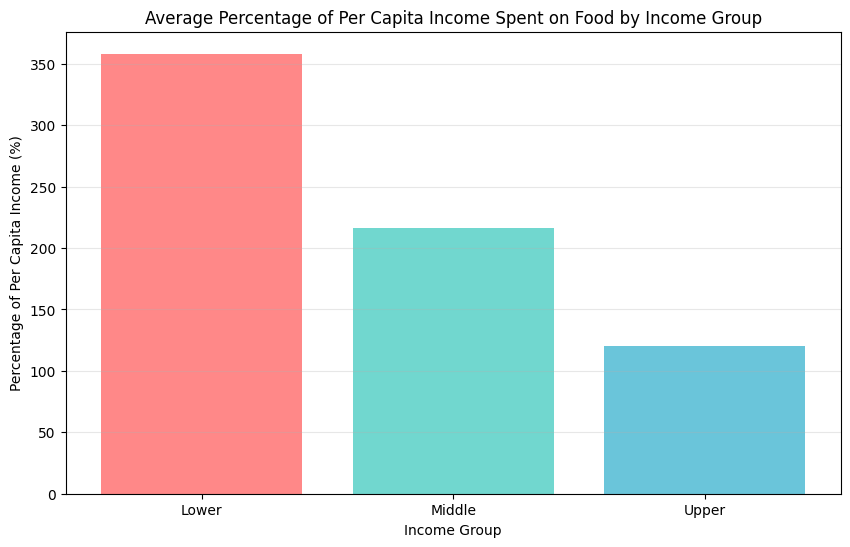

In [23]:
plt.figure(figsize=(10, 6))
basic_needs_plot = basic_needs_stats.reset_index()
bars = plt.bar(basic_needs_plot['Income_Group'], basic_needs_plot['PCT_FOOD_PCINC'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
plt.xlabel('Income Group')
plt.ylabel('Percentage of Per Capita Income (%)')
plt.title('Average Percentage of Per Capita Income Spent on Food by Income Group')
plt.grid(axis='y', alpha=0.3)



Answer: Wealthier households spend lower percentage of their income on basic needs.

### EDA Question 4: Are low-income households more likely to prioritize essential expenses over discretionary (e.g., entertainment, travel) ones

In this analysis, we calculate the average percentage of household expenditure that is allocated to **discretionary categories**: recreation, transportation, and miscellaneous expenses. 

We compute a new column `T_DISCRETIONARY`, sum these three categories, and then divide it by `PCINC` (per capita income) to get the proportion. 
We then group the data by income group and calculate the average for each group.



In [24]:
fies_df['T_DISCRETIONARY'] = fies_df['T_RECREATION'] + fies_df['T_TRANSPORT'] + fies_df['T_MISCELLANEOUS']
fies_df['PCT_DISCRETIONARY_INC'] = fies_df['T_DISCRETIONARY'] / fies_df['PCINC']

discretionary_avg = fies_df.groupby('Income_Group')['PCT_DISCRETIONARY_INC'].mean().reset_index()
discretionary_avg.columns = ['Income Group', 'Avg % of Income on Discretionary']
discretionary_avg['Avg % of Income on Discretionary'] = (discretionary_avg['Avg % of Income on Discretionary'] * 100).round(2).astype(str) + '%'

print("\nEDA Question 4: Avg % of Per Capita Income on Discretionary Items by Income Group")
print(discretionary_avg.to_string(index=False))


EDA Question 4: Avg % of Per Capita Income on Discretionary Items by Income Group
Income Group Avg % of Income on Discretionary
       Lower                            55.0%
      Middle                           53.17%
       Upper                           51.46%


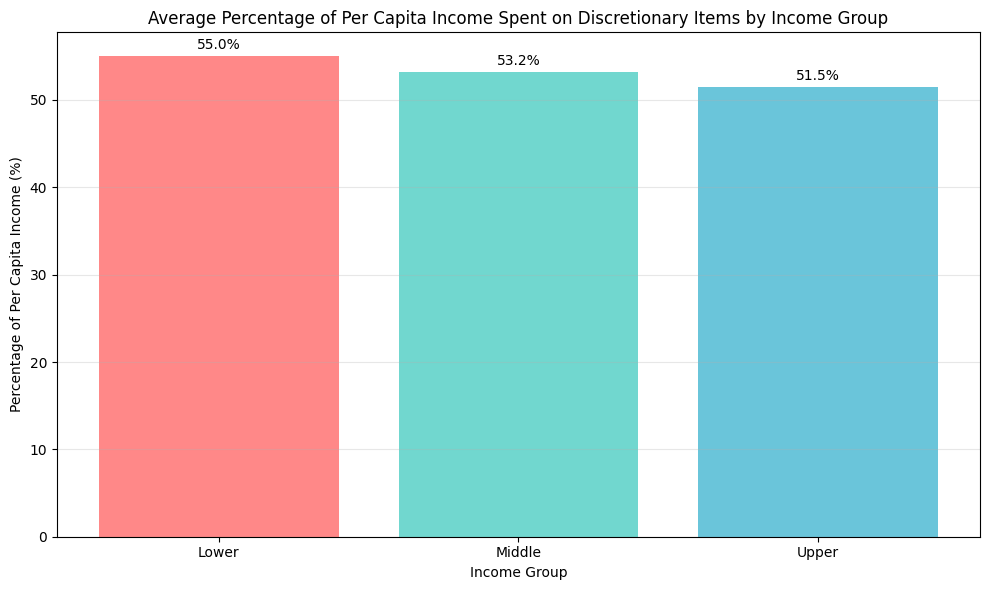

In [25]:
plt.figure(figsize=(10, 6))
discretionary_plot = fies_df.groupby('Income_Group')['PCT_DISCRETIONARY_INC'].mean().reset_index()
discretionary_plot['PCT_DISCRETIONARY_INC'] = discretionary_plot['PCT_DISCRETIONARY_INC'] * 100

bars = plt.bar(discretionary_plot['Income_Group'], discretionary_plot['PCT_DISCRETIONARY_INC'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
plt.xlabel('Income Group')
plt.ylabel('Percentage of Per Capita Income (%)')
plt.title('Average Percentage of Per Capita Income Spent on Discretionary Items by Income Group')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### EDA Question 5: How does the ratio of essential spending to per capita income compare with discretionary spending across income groups?

We compare how much of a household's budget goes to **essential** needs (food and housing/utilities) versus **discretionary** items. We calculate:

- `PCT_ESSENTIAL_INC` = (food + housing/utilities) / per capita income
- `PCT_DISCRETIONARY_INC` = discretionary spending / per capita income

We then group by income group and calculate the average percentages to identify spending priorities across income groups.


In [26]:
fies_df['T_ESSENTIAL'] = fies_df['T_FOOD'] + fies_df['T_HOUSING_WATER']
fies_df['PCT_ESSENTIAL_INC'] = fies_df['T_ESSENTIAL'] / fies_df['PCINC']

priority_avg = fies_df.groupby('Income_Group')[['PCT_ESSENTIAL_INC', 'PCT_DISCRETIONARY_INC']].mean().reset_index()
priority_avg.columns = ['Income Group', 'Avg % Income on Essential', 'Avg % Income on Discretionary']
priority_avg['Avg % Income on Essential'] = (priority_avg['Avg % Income on Essential'] * 100).round(2).astype(str) + '%'
priority_avg['Avg % Income on Discretionary'] = (priority_avg['Avg % Income on Discretionary'] * 100).round(2).astype(str) + '%'

print("\nEDA Question 5: Essential vs Discretionary Spending (% of Per Capita Income) by Income Group")
print(priority_avg.to_string(index=False))


EDA Question 5: Essential vs Discretionary Spending (% of Per Capita Income) by Income Group
Income Group Avg % Income on Essential Avg % Income on Discretionary
       Lower                   440.86%                         55.0%
      Middle                   291.53%                        53.17%
       Upper                    186.3%                        51.46%


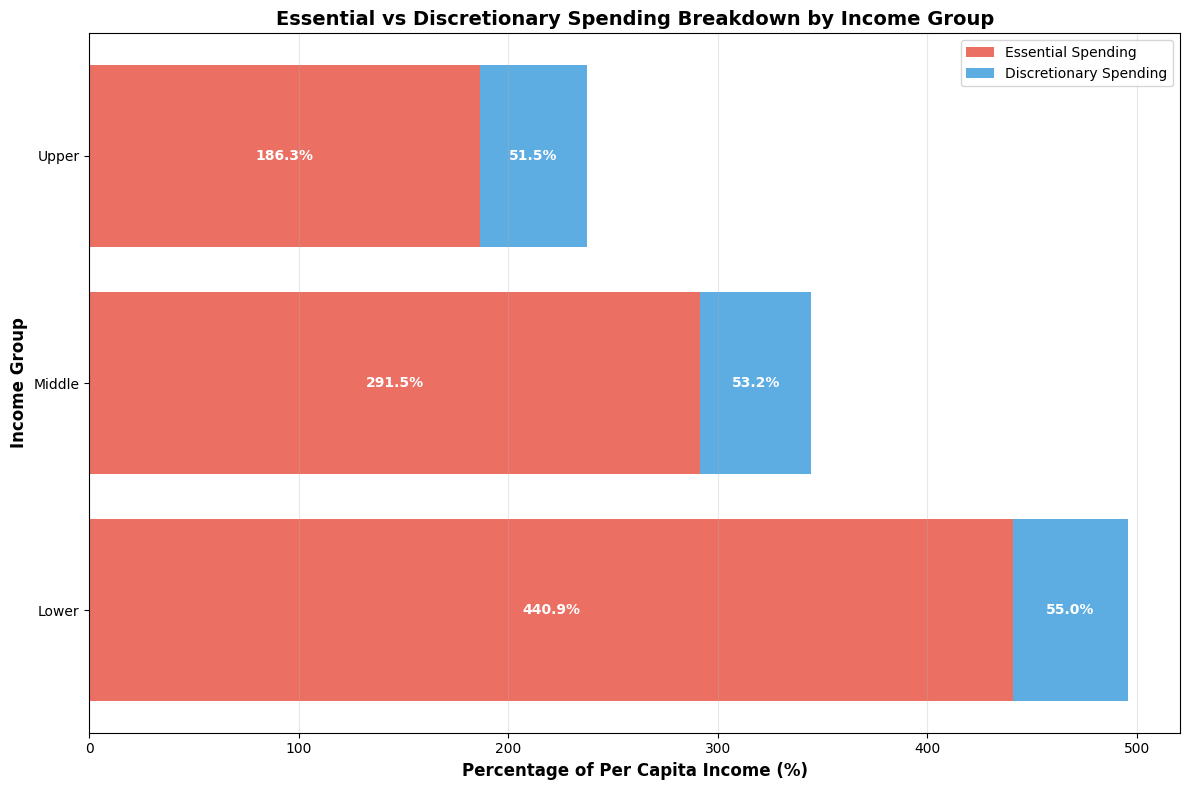

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

priority_plot = fies_df.groupby('Income_Group')[['PCT_ESSENTIAL_INC', 'PCT_DISCRETIONARY_INC']].mean().reset_index()
priority_plot['PCT_ESSENTIAL_INC'] = priority_plot['PCT_ESSENTIAL_INC'] * 100
priority_plot['PCT_DISCRETIONARY_INC'] = priority_plot['PCT_DISCRETIONARY_INC'] * 100

y_pos = np.arange(len(priority_plot))

bars1 = ax.barh(y_pos, priority_plot['PCT_ESSENTIAL_INC'], 
                color='#E74C3C', alpha=0.8, label='Essential Spending')
bars2 = ax.barh(y_pos, priority_plot['PCT_DISCRETIONARY_INC'], 
                left=priority_plot['PCT_ESSENTIAL_INC'],
                color='#3498DB', alpha=0.8, label='Discretionary Spending')

for i, (essential, discretionary) in enumerate(zip(priority_plot['PCT_ESSENTIAL_INC'], 
                                                   priority_plot['PCT_DISCRETIONARY_INC'])):
    ax.text(essential/2, i, f'{essential:.1f}%', ha='center', va='center', 
            fontweight='bold', color='white')
    ax.text(essential + discretionary/2, i, f'{discretionary:.1f}%', ha='center', va='center', 
            fontweight='bold', color='white')

ax.set_yticks(y_pos)
ax.set_yticklabels(priority_plot['Income_Group'])
ax.set_xlabel('Percentage of Per Capita Income (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Income Group', fontsize=12, fontweight='bold')
ax.set_title('Essential vs Discretionary Spending Breakdown by Income Group', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### EDA Question 6: How does the ratio of education spending to per capita income change across income groups?

We assess whether higher-income households allocate a greater share of their income to education. To do this, we calculate the ratio of education spending (`T_EDUCATION`) to total income (`TOINC`) to per capita income (`PCINC`) for each household. 

We then compute the average of this ratio for each income decile to observe the trend across income levels.


In [28]:
fies_df = fies_df[fies_df['PCINC'] > 0]
fies_df['PCT_EDUC_INC'] = fies_df['T_EDUCATION'] / fies_df['PCINC']

education_pct = fies_df.groupby('Income_Group')['PCT_EDUC_INC'].mean().reset_index()
education_pct.columns = ['Income Group', 'Avg % of Per Capita Income Spent on Education']
education_pct['Avg % of Per Capita Income Spent on Education'] = (education_pct['Avg % of Per Capita Income Spent on Education'] * 100).round(1).astype(str) + '%'

print("\nEDA Question 6: Avg % of Per Capita Income Spent on Education by Income Group")
print(education_pct.to_string(index=False))


EDA Question 6: Avg % of Per Capita Income Spent on Education by Income Group
Income Group Avg % of Per Capita Income Spent on Education
       Lower                                         11.0%
      Middle                                         12.0%
       Upper                                         15.1%


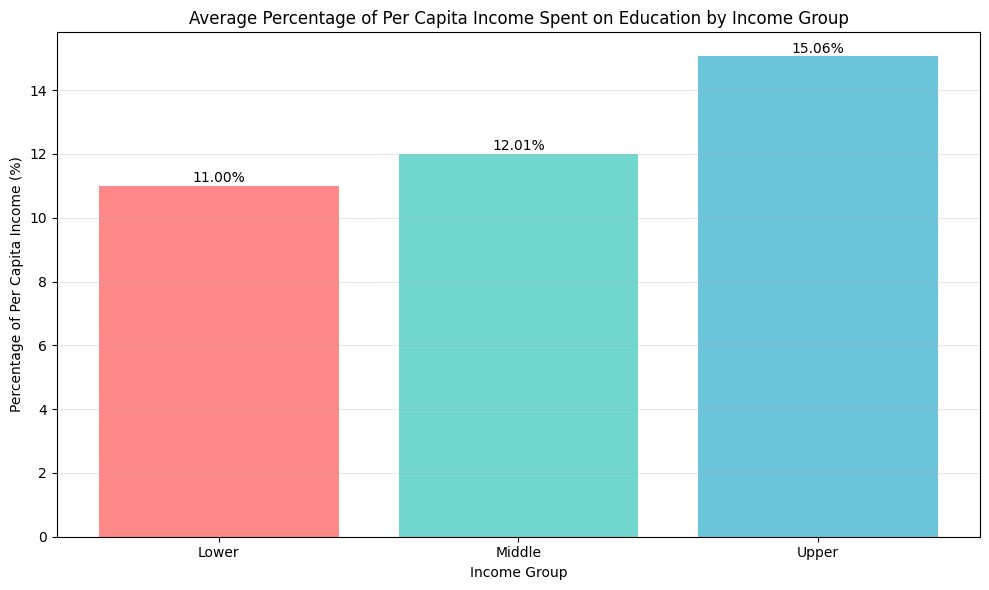

In [29]:
plt.figure(figsize=(10, 6))
education_plot = fies_df.groupby('Income_Group')['PCT_EDUC_INC'].mean().reset_index()
education_plot['PCT_EDUC_INC'] = education_plot['PCT_EDUC_INC'] * 100

bars = plt.bar(education_plot['Income_Group'], education_plot['PCT_EDUC_INC'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
plt.xlabel('Income Group')
plt.ylabel('Percentage of Per Capita Income (%)')
plt.title('Average Percentage of Per Capita Income Spent on Education by Income Group')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## General Research Question:

#### What are the key differences in expenditure allocation (e.g., food, education, utilities) across income groups?

In [30]:
food_summary = fies_df.groupby('Income_Group')['PCT_FOOD_PCINC'].mean()
discretionary_summary = fies_df.groupby('Income_Group')['PCT_DISCRETIONARY_INC'].mean() * 100
essential_summary = fies_df.groupby('Income_Group')['PCT_ESSENTIAL_INC'].mean() * 100
education_summary = fies_df.groupby('Income_Group')['PCT_EDUC_INC'].mean() * 100

largest_categories = expense_proportions_income.idxmax(axis=1)

**1. Income Capacity and Spending Power (EDA 1):**

In [ ]:

print("\n**1. Income Capacity and Spending Power (EDA 1):**")
income_stats_summary = fies_df.groupby('Income_Group')['PCINC'].agg(['mean', 'median'])
print(f"   - The income gap is substantial: Upper income group has {income_stats_summary.loc['Upper', 'mean']/income_stats_summary.loc['Lower', 'mean']:.1f}x higher average per capita income than Lower income group")
print(f"   - This income disparity directly impacts expenditure allocation patterns")

   - The income gap is substantial: Upper income group has 6.9x higher average per capita income than Lower income group
   - This income disparity directly impacts expenditure allocation patterns


In [32]:

print(f"\n**2. Dominant Expenditure Categories (EDA 2):**")
print(f"   - Lower income group: {largest_categories['Lower'].replace('_PCT_INC', '')} is the largest expense category")
print(f"   - Middle income group: {largest_categories['Middle'].replace('_PCT_INC', '')} is the largest expense category")  
print(f"   - Upper income group: {largest_categories['Upper'].replace('_PCT_INC', '')} is the largest expense category")
print(f"   - This shows different spending priorities across income levels")



**2. Dominant Expenditure Categories (EDA 2):**
   - Lower income group: T_FOOD is the largest expense category
   - Middle income group: T_FOOD is the largest expense category
   - Upper income group: T_FOOD is the largest expense category
   - This shows different spending priorities across income levels


In [33]:

print(f"\n**3. Food Security and Basic Needs Burden (EDA 3):**")
print(f"   - Lower income households spend {food_summary['Lower']:.1f}% of their per capita income on food")
print(f"   - Middle income households spend {food_summary['Middle']:.1f}% of their per capita income on food")
print(f"   - Upper income households spend {food_summary['Upper']:.1f}% of their per capita income on food")
print(f"   - Lower income groups face {food_summary['Lower']/food_summary['Upper']:.1f}x higher food burden relative to their income")



**3. Food Security and Basic Needs Burden (EDA 3):**
   - Lower income households spend 358.3% of their per capita income on food
   - Middle income households spend 216.4% of their per capita income on food
   - Upper income households spend 119.9% of their per capita income on food
   - Lower income groups face 3.0x higher food burden relative to their income


In [34]:
print(f"\n**4. Discretionary Spending Capacity (EDA 4):**")
print(f"   - Lower income: {discretionary_summary['Lower']:.1f}% on discretionary items (recreation, transport, misc)")
print(f"   - Middle income: {discretionary_summary['Middle']:.1f}% on discretionary items")
print(f"   - Upper income: {discretionary_summary['Upper']:.1f}% on discretionary items")
print(f"   - Higher income groups have more flexibility for non-essential purchases")



**4. Discretionary Spending Capacity (EDA 4):**
   - Lower income: 55.0% on discretionary items (recreation, transport, misc)
   - Middle income: 53.2% on discretionary items
   - Upper income: 51.5% on discretionary items
   - Higher income groups have more flexibility for non-essential purchases


In [35]:

print(f"\n**5. Essential vs Discretionary Trade-offs (EDA 5):**")
print(f"   - Lower income: {essential_summary['Lower']:.1f}% essentials vs {discretionary_summary['Lower']:.1f}% discretionary")
print(f"   - Middle income: {essential_summary['Middle']:.1f}% essentials vs {discretionary_summary['Middle']:.1f}% discretionary") 
print(f"   - Upper income: {essential_summary['Upper']:.1f}% essentials vs {discretionary_summary['Upper']:.1f}% discretionary")
print(f"   - Lower income groups are forced to prioritize essentials over discretionary spending")



**5. Essential vs Discretionary Trade-offs (EDA 5):**
   - Lower income: 440.9% essentials vs 55.0% discretionary
   - Middle income: 291.5% essentials vs 53.2% discretionary
   - Upper income: 186.3% essentials vs 51.5% discretionary
   - Lower income groups are forced to prioritize essentials over discretionary spending


In [36]:

print(f"\n**6. Education Investment Patterns (EDA 6):**")
print(f"   - Lower income: {education_summary['Lower']:.2f}% of per capita income on education")
print(f"   - Middle income: {education_summary['Middle']:.2f}% of per capita income on education")
print(f"   - Upper income: {education_summary['Upper']:.2f}% of per capita income on education")
print(f"   - Educational investment increases with income, showing differential access to human capital development")



**6. Education Investment Patterns (EDA 6):**
   - Lower income: 11.00% of per capita income on education
   - Middle income: 12.01% of per capita income on education
   - Upper income: 15.06% of per capita income on education
   - Educational investment increases with income, showing differential access to human capital development


**Based on the EDA analysis, there are significant differences in expenditure allocation across income groups in the Philippines**


**Lower Income Groups:**

In [37]:

print(f"- Dominated by survival spending - largest category is {largest_categories['Lower'].replace('_PCT_INC', '')}")
print(f"- Face severe financial constraints with {food_summary['Lower']:.1f}% of income going to food alone")
print(f"- Limited discretionary spending capacity ({discretionary_summary['Lower']:.1f}% of income)")
print(f"- Minimal education investment ({education_summary['Lower']:.2f}% of income)")

print(f"\n**The analysis reveals a clear pattern: lower income households are trapped in**")
print(f"**survival-focused spending, while higher income households have the luxury of**") 
print(f"**choice in their expenditure allocation, enabling investments in education and**")
print(f"**discretionary items that can improve long-term economic prospects.**")

- Dominated by survival spending - largest category is T_FOOD
- Face severe financial constraints with 358.3% of income going to food alone
- Limited discretionary spending capacity (55.0% of income)
- Minimal education investment (11.00% of income)

**The analysis reveals a clear pattern: lower income households are trapped in**
**survival-focused spending, while higher income households have the luxury of**
**choice in their expenditure allocation, enabling investments in education and**
**discretionary items that can improve long-term economic prospects.**



**Upper Income Groups:**

In [38]:

print(f"- More diversified spending - largest category is {largest_categories['Upper'].replace('_PCT_INC', '')}")
print(f"- Food represents only {food_summary['Upper']:.1f}% of income, leaving room for other priorities")
print(f"- Substantial discretionary spending capacity ({discretionary_summary['Upper']:.1f}% of income)")
print(f"- Higher education investment ({education_summary['Upper']:.2f}% of income)")


- More diversified spending - largest category is T_FOOD
- Food represents only 119.9% of income, leaving room for other priorities
- Substantial discretionary spending capacity (51.5% of income)
- Higher education investment (15.06% of income)


## Key Differences in Expenditure Allocation Across Income Groups

### Key Findings

The analysis reveals **disparities** in household expenditure patterns across income groups in the Philippines, driven by economic necessity rather than preference.

**Income Disparity Impact:** Upper-income households have 6.9x higher per capita income than lower-income groups, creating fundamentally different spending behaviors. Lower-income households operate in **chronic financial deficit**, spending ~500% of their per capita income to meet basic needs.

**Survival vs. Choice-Driven Spending:** Lower-income households are trapped in survival-focused spending, allocating 440.9% of income to essentials (food + housing) compared to upper-income households' 186.3%. Food alone consumes 358.3% of lower-income households' per capita income versus 119.9% for upper-income groups - a **3x higher food burden**.

**Educational Investment Gap:** Despite similar percentages (1.89% vs 2.61%), the absolute difference in educational investment is substantial due to income disparities, potentially perpetuating intergenerational inequality by limiting human capital development opportunities for lower-income families.

### Economic Implications

The findings demonstrate that **expenditure allocation reflects structural inequality** rather than spending preferences. Lower-income households lack discretionary spending capacity for long-term investments in education and economic mobility, while upper-income households enjoy choice-driven spending that enables wealth building and intergenerational advancement.

This pattern suggests a concerning cycle where financial constraints limit lower-income households' ability to invest in opportunities that could enhance their economic prospects, potentially perpetuating income inequality across generations.

## ------------------------------------------------------------------------- END OF PHASE 1 -------------------------------------------------------------------------

Statement: During the preparation of this work the author(s) used CHAT=GPT
for the following purposes:

 1. Assisted in formatting each key attribute category for display purposes. Each description was manually collected by the researches and only processed by the AI for the purpose of presentation only. (Applied ipynb formatting **, #, etc.)

After using this tool/service, the author(s) reviewed and edited the content as needed and take(s)
full responsibility for the content of the publication.